## **Laboratorio 10: Aplicaciones del método de Descenso de Gradiente y el método de Newton**

**Facultad de ingeniería**

Departamento de Ingeniería Biomédica

Universidad de los Andes

**IBIO-2340** Fundamentos de Machine Learning.

**Nombres de los integrantes**


1.   Nombre integrante 1
2.   Nombre integrante 2

**Número del grupo**

*Escribir el número del grupo*


# **1. Introducción al problema**

El centro de atención médica "Los Robles" es una institución de servicios de salud con más de 100 años de trayectoria que se encuentra ubicada en el centro del municipio de San Antonio. Sus empleados, tanto administrativos como personal médico, residen en zonas aledañas al pueblo. Debido al deterioro que ha tenido el edificio durante los 100 años de funcionamiento, el nuevo gerente busca reubicar el centro de salud en una zona que reduzca la distancia de desplazamiento de los empleados sin que se aleje demasiado de la posición actual. Para ello, ha contratado un equipo de ingenieros biomédicos de la Universidad de los Andes, quienes se encargarán de definir la mejor localización para el nuevo centro de salud.

Después de hacer un estudio, se determinaron las coordenadas de ubicación de la vivienda de los 20 empleados actuales así como las coordenadas de ubicación del actual centro de salud. Esta información se encuentra en el archivo ***localizaciones.csv***. Las primeras 20 coordenadas en el archivo corresponden a la localización de los empleados y la última es la ubicación actual del centro de salud.

Para solucionar el problema y hallar el punto óptimo para la localización del nuevo centro de salud, el gerente pide:

* Minimizar el cuadrado de la distancia euclidiana entre cada coordenada de los empleados y la localización del nuevo centro de salud

* Minimizar simultáneamente el cuadrado de la distancia euclidiana entre la nueva y la actual localización del centro de salud.

* Dar una prioridad de 15 a la minimización de la distancia de los empleados respecto a la minimización de la distancia de la actual ubicación.

No se dispone de restricción alguna respecto a la nueva ubicación del centro de salud. Para facilitar el análisis, sean $p^{(i)}=[p_1^{(i)},p_2^{(i)}]^T$ las coordenadas del $i$-ésimo empleado, $x=[x_1,x_2]^T$ las coordenadas de la nueva ubicación y $q=[q_1,q_2]^T$ las coordenadas de la actual ubicación.

# **2. Ejercicios**

In [ ]:
import numpy as np
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt

**2.1.** Defina el problema de optimización asociado a los requerimientos de la gerencia del centro de salud.

In [ ]:
DataFrame = pd.read_csv("localizaciones.csv")

p1 = np.array(DataFrame["x1"])[0:-1]
p2 = np.array(DataFrame["x2"])[0:-1]

q1, q2 = np.array(DataFrame["x1"][20]), np.array(DataFrame["x2"][20])

x1, x2 = sym.symbols("x_1,x_2",real=True)

f = sym.sqrt( (q1 - x1)**2 + (q2 - x2)**2)

for i in range(20):
    f += 15*sym.sqrt( (p1[i]-x1)**2 + (p2[i]-x2)**2)

f_num = sym.lambdify([x1,x2], f)

**2.2.** Implemente el método de Descenso de Gradiente para encontrar la ubicación óptima del nuevo centro de salud. Para ello, utilice al menos tres valores diferentes para la tasa de aprendizaje $\alpha$. Además defina la tolerancia, el criterio de parada y el número máximo de pasos del algoritmo. Justifique su elección.

In [ ]:
def gradient(p):
    """
    Calcula el gradiente de la función f en un punto dado.
    """
    df_dx1 = sym.diff(f,x1)
    df_dx2 = sym.diff(f,x2)

    df_dx1_num = sym.lambdify([x1,x2],df_dx1)
    df_dx2_num = sym.lambdify([x1,x2],df_dx2)

    return np.array([df_dx1_num(p[0],p[1]), df_dx2_num(p[0],p[1])])
                     

def gradient_descent1(x0, alpha, N, epsilon):
    """
    Implementa el algoritmo de Descenso de Gradiente con un criterio de parada basado en la tolerancia ε.
    
    Parámetros:
    - x0: Punto inicial.
    - alpha: Tasa de aprendizaje (paso del descenso).
    - N: Número máximo de iteraciones.
    - epsilon: Tolerancia para la convergencia.

    Retorna:
    - history_x: Historial de puntos visitados por el algoritmo.
    - history_f: Valores de la función evaluada en cada punto.
    - x0_min: Punto donde se alcanza el mínimo estimado.
    - stop: Indica si el número máximo de iteraciones fue superado (True) o no (False).
    """
    history_x = []
    history_f = []

    stop = True
    
    for i in range(N):
        x0_old = x0.copy()
        x0 = x0_old - alpha * gradient(x0_old)

        history_x.append(list(x0))
        history_f.append(f_num(x0[0], x0[1]))

        if np.linalg.norm(x0 - x0_old) <= epsilon:
            stop = False
            break

    x0_min = x0
    
    history_x = np.array(history_x)
    history_f = np.array(history_f)

    return history_x, history_f, x0_min, stop

In [78]:
history_xg1, history_fg1, x0_ming1, stop1 = gradient_descent1([q1,q2], 0.05, 1000, 0.001)
history_xg1, history_fg1, x0_ming1, stop1

(array([[69.7424851 , 98.1986004 ],
        [61.0978227 , 86.11165153],
        [52.47228878, 74.0617227 ],
        ...,
        [17.50412125, 25.56235093],
        [18.29332558, 25.78190342],
        [17.50412125, 25.56235093]]),
 array([27577.53793695, 23166.59552295, 18784.78222642, 14460.75453437,
        10278.26066876,  6600.66325451,  4551.2843185 ,  4230.64666913,
         4204.50509261,  4201.89788119,  4202.71482384,  4205.44488318,
         4206.34472701,  4205.45731699,  4205.53274961,  4205.32515463,
         4205.64887079,  4205.38242442,  4205.62997698,  4205.36419138,
         4205.63332011,  4205.36946418,  4205.63267622,  4205.36800245,
         4205.63281332,  4205.36839937,  4205.63278177,  4205.36829271,
         4205.63278946,  4205.36832121,  4205.63278752,  4205.36831362,
         4205.63278802,  4205.36831564,  4205.63278789,  4205.3683151 ,
         4205.63278792,  4205.36831524,  4205.63278791,  4205.36831521,
         4205.63278792,  4205.36831522,  4205.632

In [103]:
history_xg2, history_fg2, x0_ming2, stop2 = gradient_descent1([q1,q2], 0.025, 1000, 0.001)
history_xg2, history_fg2, x0_ming2, stop2

(array([[ 74.10109318, 104.26258573],
        [ 69.77437622,  98.21382221],
        [ 65.45087004,  92.17115166],
        ...,
        [ 17.76149683,  25.85549726],
        [ 17.8797957 ,  25.8983111 ],
        [ 17.76149683,  25.85549726]]),
 array([29798.07976057, 27586.73190775, 25379.72341058, 23178.36806626,
        20984.56881627, 18801.18769228, 16632.73040163, 14486.69892894,
        12376.47681641, 10328.06587976,  8397.87102052,  6720.61940627,
         5506.56679889,  4756.64199877,  4324.28249206,  4219.38331592,
         4201.90032946,  4201.54619927,  4201.41021613,  4201.35792986,
         4201.33805279,  4201.33054243,  4201.32773554,  4201.32672066,
         4201.32641961,  4201.32646135,  4201.32678021,  4201.32749271,
         4201.32892426,  4201.33172414,  4201.33715659,  4201.34738845,
         4201.3660788 ,  4201.3971459 ,  4201.44327004,  4201.49546498,
         4201.53965299,  4201.55409862,  4201.54847584,  4201.5267461 ,
         4201.5096518 ,  4201.4941459

In [ ]:
history_xg3, history_fg3, x0_ming3, stop3 = gradient_descent1([q1,q2], 0.01, 1000, 0.001)
history_xg3, history_fg3, x0_ming3, stop3

(array([[ 76.71625804, 107.90097692],
        [ 74.98467856, 105.48044668],
        [ 73.25350906, 103.06070211],
        [ 71.5227967 , 100.64181527],
        [ 69.79258923,  98.22387214],
        [ 68.06293971,  95.80697171],
        [ 66.33390823,  93.39122781],
        [ 64.60556346,  90.97677172],
        [ 62.87798424,  88.56375563],
        [ 61.15126166,  86.15235689],
        [ 59.42550141,  83.7427835 ],
        [ 57.7008268 ,  81.33528095],
        [ 55.97738245,  78.93014118],
        [ 54.25533888,  76.52771407],
        [ 52.53489831,  74.12842265],
        [ 50.8163019 ,  71.73278326],
        [ 49.09983889,  69.34143269],
        [ 47.38585817,  66.95516547],
        [ 45.6747827 ,  64.57498536],
        [ 43.96712768,  62.2021783 ],
        [ 42.26352284,  59.83841684],
        [ 40.56473957,  57.48591282],
        [ 38.87172349,  55.14764403],
        [ 37.18563424,  52.82769669],
        [ 35.50790266,  50.53178995],
        [ 33.84034718,  48.26808579],
        [ 32

**2.3.** Grafique la trayectoria de la solución seguida por el algoritmo según los parámetros dados (es decir, cómo cambia la ubicación del puesto de salud en cada paso del algoritmo) para el método de Descenso de Gradiente. En esta gráfica incluya las 20 coordenadas de ubicación de los empleados asi como la posición del puesto de salud actual.

Text(0, 0.5, 'x2')

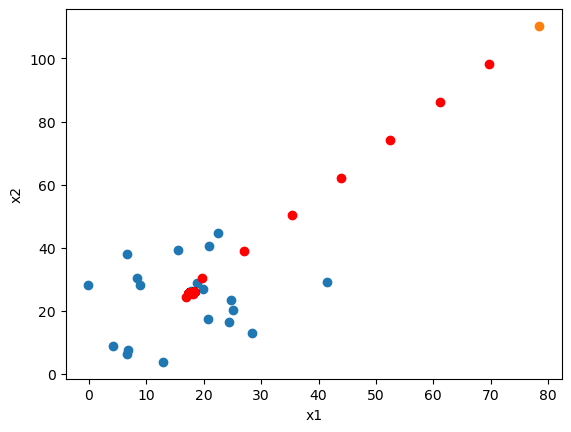

In [ ]:
plt.scatter(p1,p2)
plt.scatter(q1,q2)

for i in history_xg1:
    plt.scatter(i[0], i[1], color = "red")

plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x2')

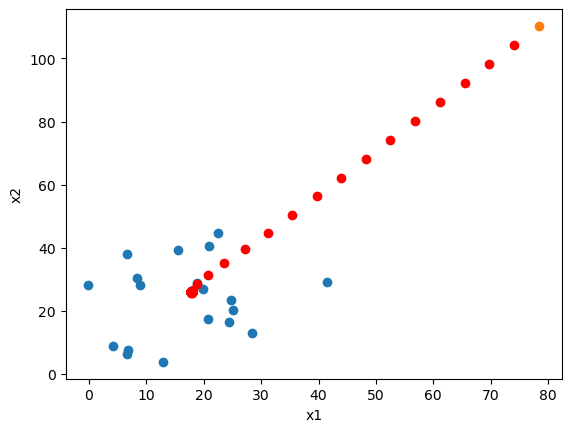

In [ ]:
plt.scatter(p1,p2)
plt.scatter(q1,q2)

for i in history_xg2:
    plt.scatter(i[0], i[1], color = "red")

plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'x2')

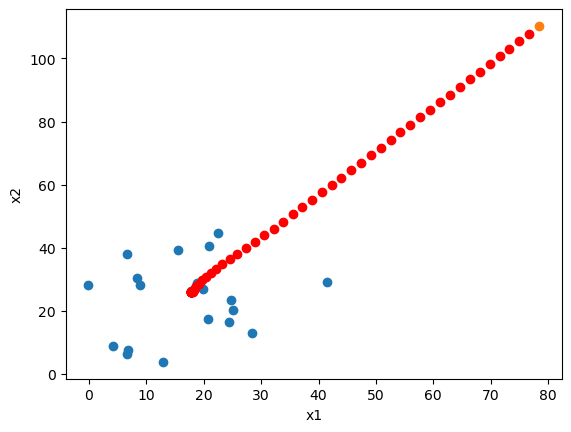

In [ ]:
plt.scatter(p1,p2)
plt.scatter(q1,q2)

for i in history_xg3:
    plt.scatter(i[0], i[1], color = "red")

plt.xlabel("x1")
plt.ylabel("x2")

**2.4.** Implemente el método de Newton para hallar la ubicación óptima del nuevo centro de salud. Además defina la tolerancia, el criterio de parada y el número máximo de pasos del algoritmo.

In [80]:
grad_f = [sym.diff(f, x1), sym.diff(f, x2)]
H_f = sym.hessian(f, (x1, x2))

grad_f_num = sym.lambdify([x1, x2], grad_f, modules="numpy")
H_f_num = sym.lambdify([x1, x2], H_f, modules="numpy")

**2.5.** Grafique la trayectoria del algoritmo según los parámetros dados para el método de Newton. En esta gráfica incluya las 20 coordenadas de ubicación de los empleados asi como la posición del puesto de salud actual.




In [ ]:
def newton_method(x0, tol=1e-5, max_iter=100):
    x = np.array(x0, dtype=float)
    trajectory = [x.copy()]
    
    for i in range(max_iter):
        grad = np.array(grad_f_num(*x), dtype=float)
        H = np.array(H_f_num(*x), dtype=float)

        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones.")
            return x, trajectory

        try:
            delta = np.linalg.inv(H)@grad
        except np.linalg.LinAlgError:
            print("Error: Hessiano no invertible.")
            return None, trajectory

        x = x - delta
        trajectory.append(x.copy())

    print("Número máximo de iteraciones alcanzado.")
    return x, trajectory

In [102]:
newton_method(np.array([20,20]), tol=1e-7, max_iter=1000)

Número máximo de iteraciones alcanzado.


(array([18.48811579, 26.16722964]),
 [array([20., 20.]),
  array([17.68469852, 26.00066674]),
  array([18.02495864, 26.32530315]),
  array([16.89278073, 24.97700244]),
  array([18.52776463, 26.08956019]),
  array([17.28309906, 25.56586187]),
  array([18.42349115, 26.1877673 ]),
  array([17.15849548, 25.50172661]),
  array([18.53566483, 26.15781824]),
  array([17.22676591, 25.50425562]),
  array([18.45266908, 26.17066133]),
  array([17.18488545, 25.51443655]),
  array([18.5129844 , 26.16465921]),
  array([17.21270082, 25.50440619]),
  array([18.47054272, 26.16862973]),
  array([17.19342713, 25.51195551]),
  array([18.50037292, 26.16613235]),
  array([17.20675552, 25.50646327]),
  array([18.47952019, 26.16792169]),
  array([17.19741694, 25.51030614]),
  array([18.49411444, 26.16671315]),
  array([17.2039225 , 25.50759644]),
  array([18.48391706, 26.16757383]),
  array([17.19936665, 25.50948464]),
  array([18.49104818, 26.166981  ]),
  array([17.20254657, 25.5081607 ]),
  array([18.486064

**2.6.** Analice los resultados obtenidos con cada método: ¿Cúal de los dos algoritmos converje mejor, por qué?, ¿cúal de los resultados obtenidos es el mejor, por qué? ¿De qué forma afecta la solución obtenida la inclusión del factor de prioridad en alguno de los dos términos de la función objetivo?

**2.7.** Presente los resultados a las directivas del centro de salud junto con la conclusión de su estudio. Para ello apóyese en gráficas lo suficientemente claras y bien presentadas, con una selección de colores y notación que facilite el entendimiento de las directivas del centro de salud.